In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
import numpy as np

dataframe = pd.read_pickle('scrobbles.pkl')
dataframe = dataframe.set_index('time').sort_index()
mask = dataframe.index > dt(2009, 1, 1)
dataframe = dataframe[mask]

In [6]:
# Make a table of album name vs time indexed
unbinned = pd.get_dummies(dataframe['artist'])

# Remove any duplicate scrobbles with the same time
unbinned = unbinned.groupby('time').min()

# Bin the table in 100 day groups
binned = unbinned.groupby(pd.TimeGrouper('30D')).sum()

# Sort the columns in descending order
sort = np.argsort(binned.to_numpy().sum(axis=0))
binned = binned.reindex(binned.columns[sort[::-1]], axis=1)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


Artists I listen to most religiously:

Text(0.5, 0, 'Monthly listens')

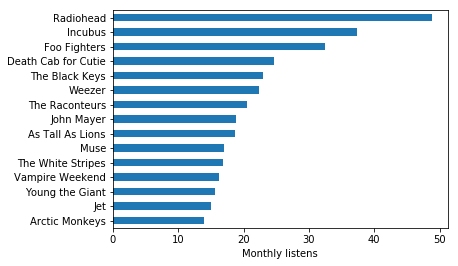

In [7]:
ax = binned.mean().sort_values()[-15:].plot('barh')
ax.set_xlabel('Monthly listens')

Artists with the sharpest peaks in listening binges: 

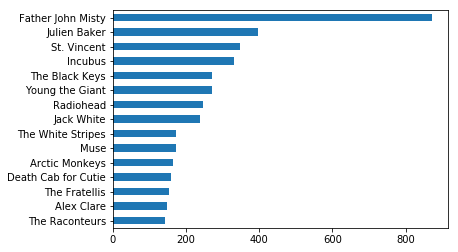

In [8]:
(binned.max() - binned.mean()).sort_values()[-15:].plot('barh')
plt.savefig('tmp/artists_peaked.png', bbox_inches='tight', dpi=200)

How did my top ten artists arrive at their final music counts over the last decade?

Text(0, 0.5, 'Listens')

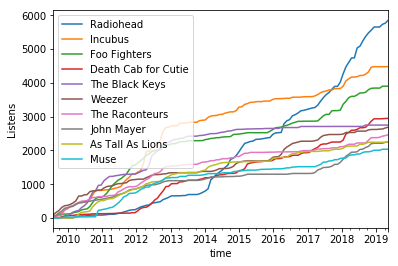

In [9]:
ax = binned.cumsum()[binned.columns[:10]].plot()

plot_radiohead_releases = False

if plot_radiohead_releases: 
    ax.axvline(dt(2011, 2, 18), ls='--') # King of Limbs
    ax.axvline(dt(2016, 5, 8), ls='--')  # Moon Shaped Pool

plt.ylabel('Listens')
# plt.savefig('tmp/artists_cumulative.png', bbox_inches='tight', dpi=200)

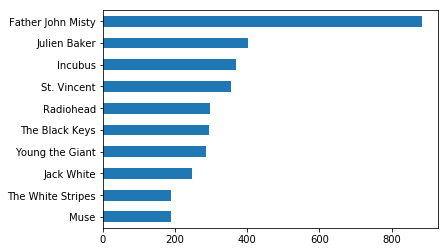

In [12]:
ax = plt.gca()
binned.cumsum().diff().max().sort_values()[-10:].plot('barh', ax=ax)
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [13]:
monthly = unbinned.set_index(unbinned.index.month).groupby('time').sum()

# Sort the columns in descending order
sort = np.argsort(monthly.to_numpy().sum(axis=0))
monthly = monthly.reindex(monthly.columns[sort[::-1]], axis=1)

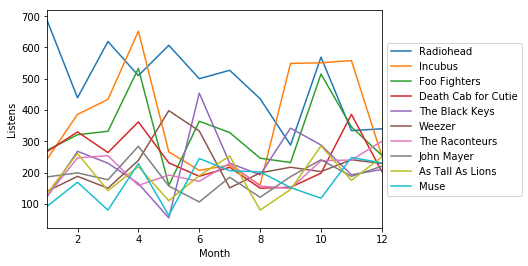

In [14]:
ax = plt.gca()
monthly[monthly.columns[:10]].plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Month')
plt.ylabel('Listens')
plt.savefig('tmp/seasons.png', bbox_inches='tight', dpi=200)

In [19]:
week_dailies = unbinned.set_index(unbinned.index.weekday).groupby('time')

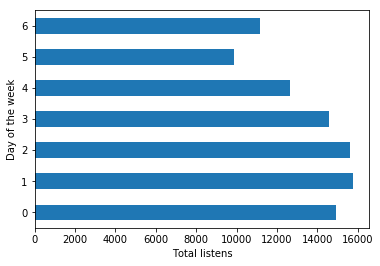

In [20]:
week_dailies.sum(axis=1).sum(axis=1).plot('barh')
plt.ylabel('Day of the week')
plt.xlabel('Total listens')
plt.savefig('tmp/dailies.png', bbox_inches='tight', dpi=200)

In [21]:
# Make a table of album name vs time indexed
unbinned = pd.get_dummies(dataframe['artist'])

# Remove any duplicate scrobbles with the same time
unbinned = unbinned.groupby('time').min()

# Bin the table in 100 day groups
binned = unbinned.groupby(pd.TimeGrouper('1D')).sum()

# Sort the columns in descending order
sort = np.argsort(binned.to_numpy().sum(axis=0))
binned = binned.reindex(binned.columns[sort[::-1]], axis=1)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


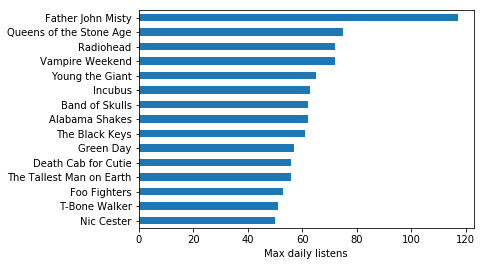

In [28]:
binned.max().sort_values()[-15:].plot('barh')
plt.xlabel('Max daily listens')
plt.savefig('tmp/daily_listens_records.png', bbox_inches='tight', dpi=200)